In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('albums_with_popularity.csv')
data = data[['artist','album','track_number','track_name','popularity']]
data['max_pop'] = data.groupby(['album'], as_index=False)['popularity'].transform(max)
data['rel_pop'] = data['popularity'] / data['max_pop']
data['num_of_tracks'] = data.groupby(['album'], as_index=False)['track_number'].transform(max)
data['progression'] = data['track_number'] / data['num_of_tracks']
data.drop(columns=['num_of_tracks','max_pop'],inplace=True)
data['big_hit'] = data['rel_pop'] > 0.95
data.sort_values(by=['progression'],inplace=True)
data = data[data['big_hit'] == True]
# #######
bins = np.arange(0.1,1.1,0.1)
bins = np.insert(bins,0,-1)
labels=[x for x in range(10)]
data=data.groupby(pd.cut(data['progression'], bins=bins, labels=labels)).size().reset_index(name='count')
data['cutoff'] = np.linspace(10,100,10)
data

,progression,count,cutoff
0,0,11,10.0
1,1,17,20.0
2,2,14,30.0
3,3,11,40.0
4,4,3,50.0
5,5,4,60.0
6,6,4,70.0
7,7,7,80.0
8,8,8,90.0
9,9,10,100.0


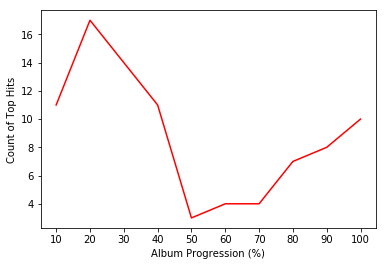

In [8]:
plt.plot(data['cutoff'],data['count'],'r-')
plt.xticks(data['cutoff'])
plt.xlabel("Album Progression (%)")
plt.ylabel("Count of Top Hits")
plt.show()